 The Spark Foundation

  Grip July 2022

Author: Swaraj Gadgul

#  Task 1 Prediction using supervised ml

## Problem statement

- Predict the percentage of a student based on study hours
<br>
- What will be the predicted score if a student studies 9.25 hr./day

##  Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.figure(figsize =(17,6))


<Figure size 1224x432 with 0 Axes>

<Figure size 1224x432 with 0 Axes>

In [2]:
data ='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [3]:
df =pd.read_csv(data)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##  Data Cleaning

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.duplicated().sum()

0

<Figure size 1224x432 with 0 Axes>

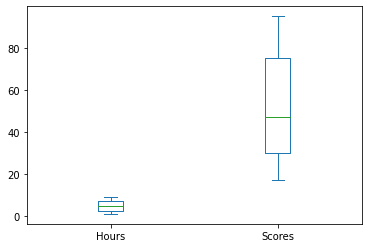

In [8]:
plt.figure(figsize =(17,6))
df.plot(kind = 'box')
plt.show()

- As the dataset does not have any missing values and duplicates,so no need of data cleaning.
<br>
- The dataset also dose not contain any outliers,so no need to treat outliers.

##  EDA

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


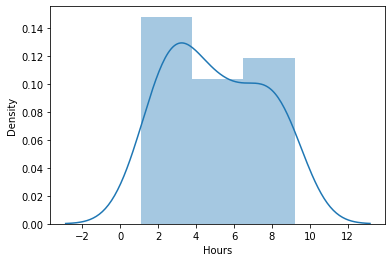

In [10]:
sns.distplot(df.Hours);

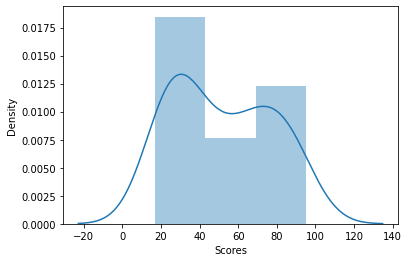

In [11]:
sns.distplot(df.Scores);

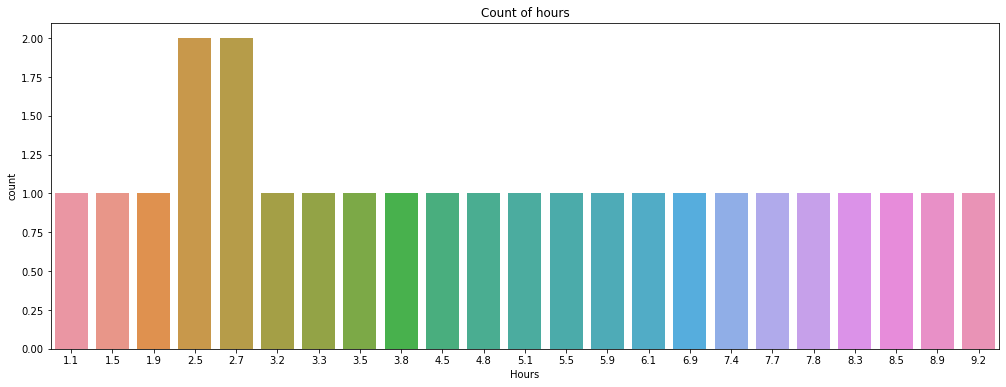

In [12]:
plt.figure(figsize =(17,6))
sns.countplot(df.Hours)
plt.title('Count of hours');

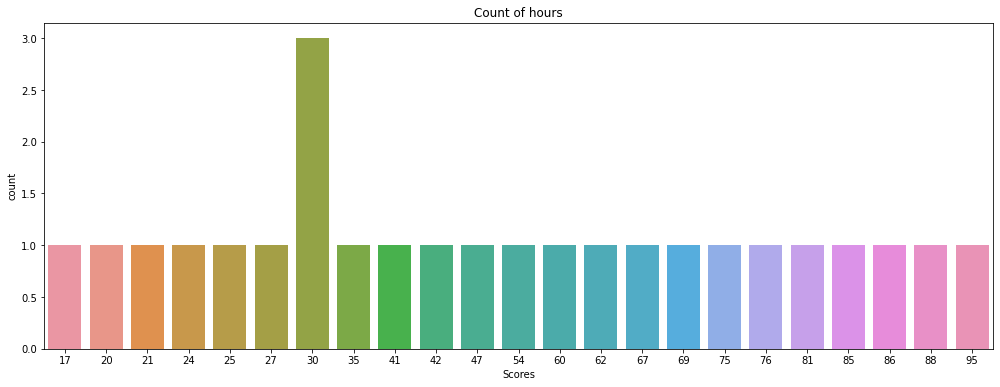

In [13]:
plt.figure(figsize =(17,6))
sns.countplot(df.Scores)
plt.title('Count of hours');

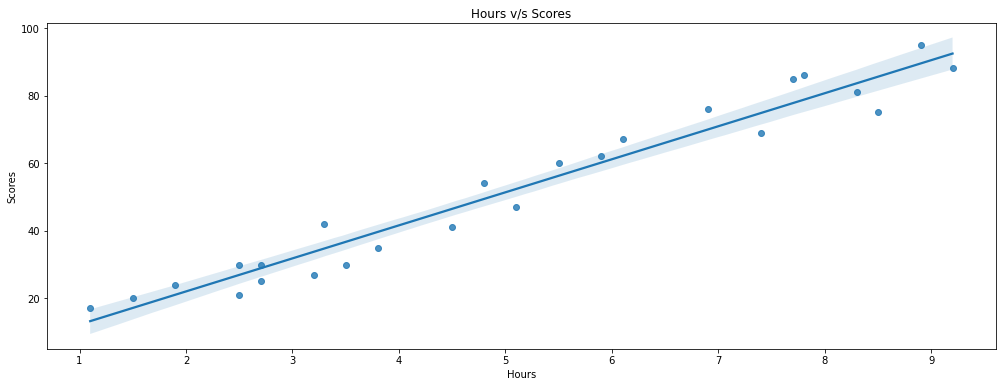

In [14]:
plt.figure(figsize =(17,6))
sns.regplot(x= 'Hours', y='Scores',data = df)
plt.title('Hours v/s Scores');

### Insights from EDA
- Min Hours are	1.10 and min score is	17.00
- Mean hours are 5.01 and score is 51.48
- Max hours are 9.20 and Score is 95.00
- There is a linear relation between Hours and Score


## Feature Engineering

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [16]:
# # reshaping X,y
# X =X.reshape(-1,1)
# y = y.reshape(-1,1)

## Machine Learning

###  Training the model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 20)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X,y)

LinearRegression()

###  Plotting the best fit line

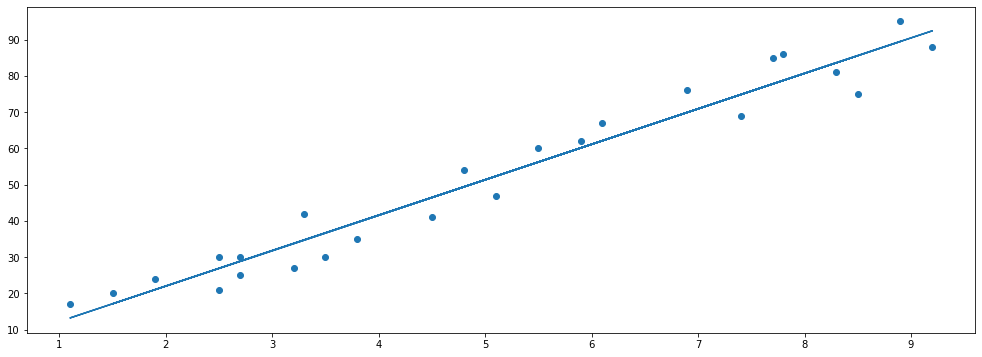

In [21]:
plt.figure(figsize=(17,6))
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

###  Making prediction

In [22]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[7.4]
 [6.9]
 [4.5]
 [3.5]
 [6.1]
 [5.1]
 [3.3]
 [2.5]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,69,74.824618
1,76,69.936717
2,41,46.474789
3,30,36.698985
4,67,62.116074
5,47,52.340271
6,42,34.743825
7,30,26.923182


In [24]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
# regressor.predict((np.array([6.5]).reshape(1, 1)))

No of Hours = 9.25
Predicted Score = 92.9098547701573


In [25]:
# Compute model slope and intercept
print(lr.coef_)
print(lr.intercept_)

[9.77580339]
2.48367340537321


###Model evaluation 

In [26]:

from sklearn.metrics import mean_squared_error
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE value is:  ",rmse)


RMSE value is:   5.701199578331619


In [27]:
# import r2_score module
from sklearn.metrics import r2_score

# Calculate and print r2_score
print("r2_score value is: ",r2_score(y_test,y_pred))


r2_score value is:  0.8859269958079627


In [28]:
# Checking for Overfitting or Underfitting the data by calculation score using score function.
print("Training set score:", lr.score(X_train, y_train))
print("Tests score is : ", lr.score(X_test, y_test))


Training set score: 0.9645918512906994
Tests score is :  0.8859269958079627
